In [1]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_path_1test = "../data/input/NASA/1st_test/1st_test/"

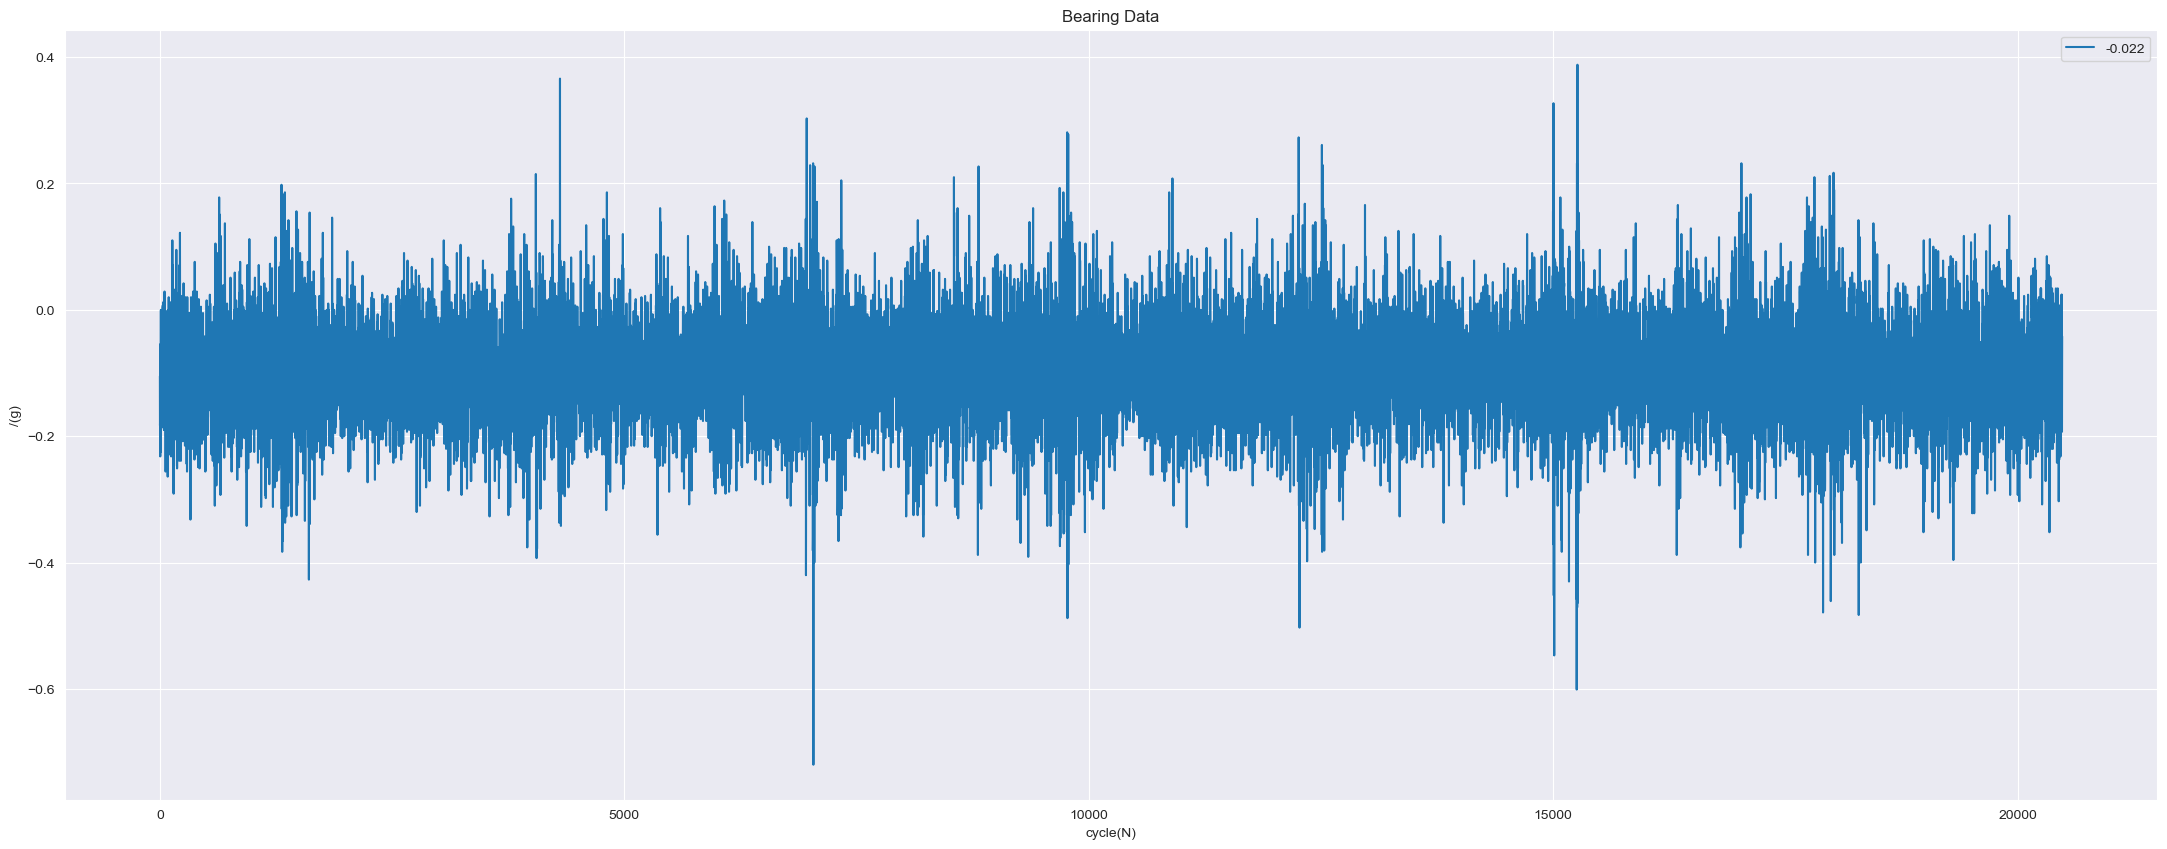

In [3]:
dataset_1test = pd.read_csv(data_path_1test + '2003.10.22.12.06.24', sep='\t')
pic = dataset_1test['-0.022'].plot(figsize=(27, 10), title="Bearing Data", legend=True)
pic.set(xlabel="cycle(N)", ylabel="/(g)")
plt.show()

In [4]:
bearing1 = dataset_1test[["-0.022", "-0.039"]]
bearing1

,-0.022,-0.039
0,-0.105,-0.017
1,-0.183,-0.098
2,-0.178,-0.161
3,-0.208,-0.129
4,-0.232,-0.061
...,...,...
20474,-0.022,-0.142
20475,0.024,-0.156
20476,-0.193,-0.303
20477,-0.115,0.076


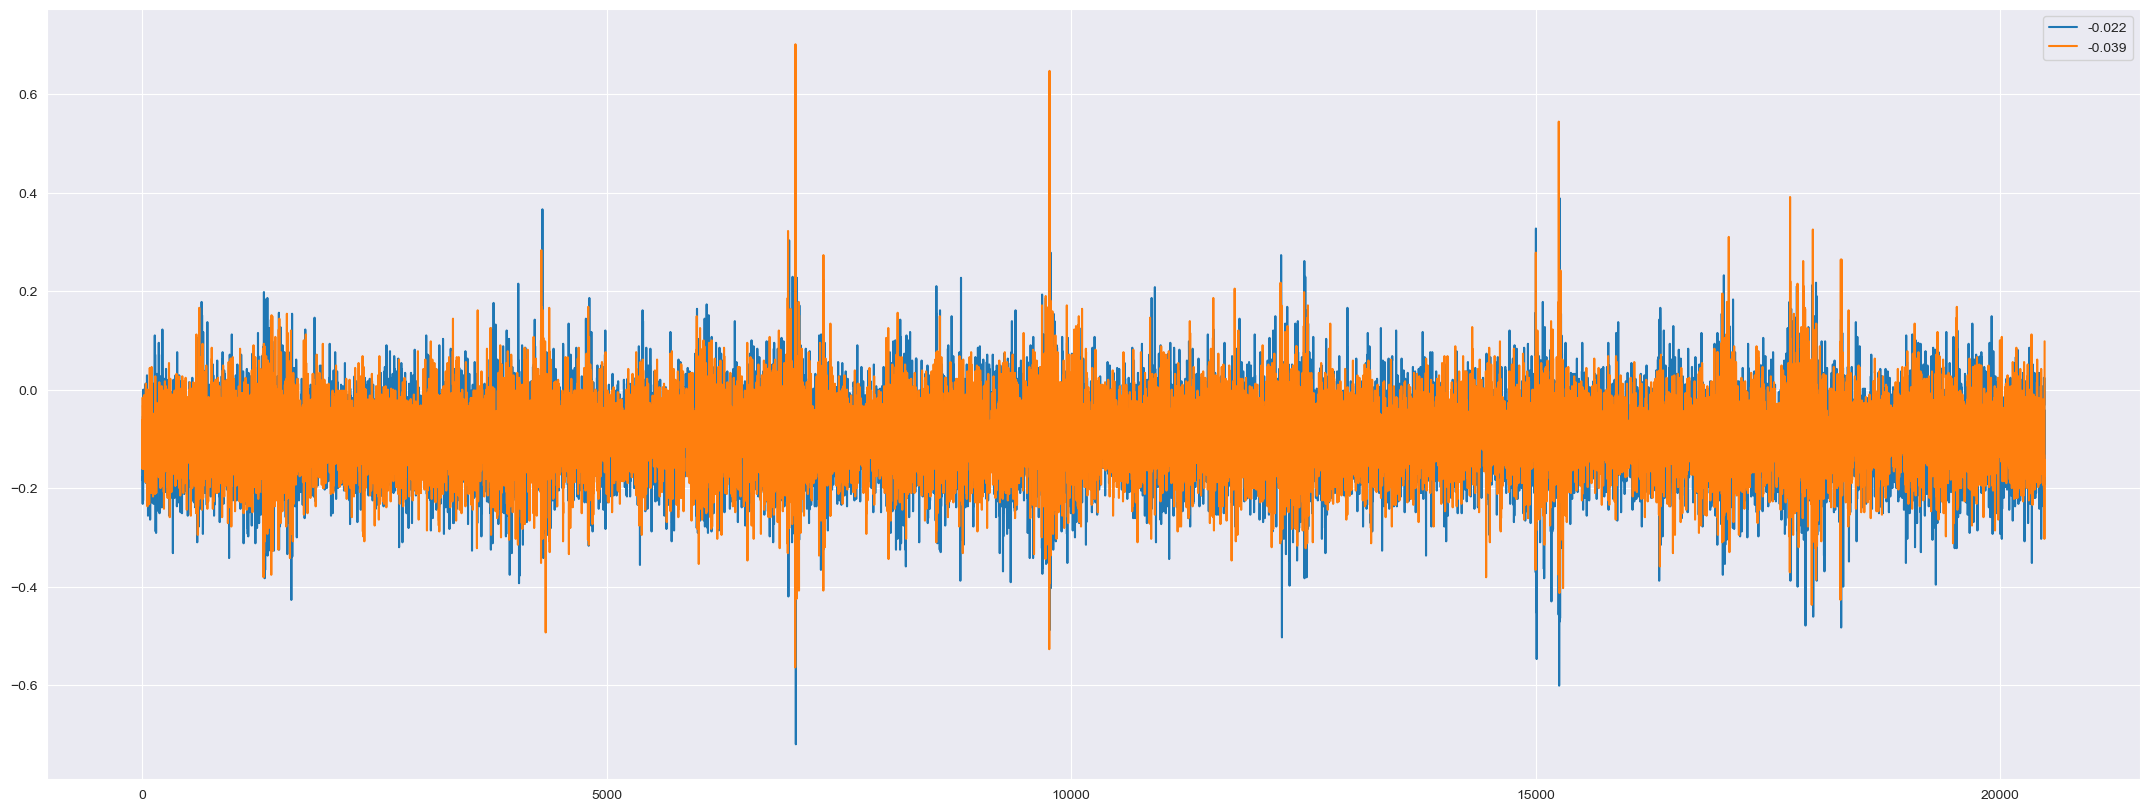

In [5]:
ax = bearing1.plot(figsize=(27, 10), legend=True)
plt.show()

HHT测试

In [9]:
from scipy.signal import hilbert
from scipy import fft
import numpy as np
from pyhht import EMD

In [8]:
N = 20479
t = np.linspace(0, 1, N)
signal = bearing1["-0.022"]
signal

0       -0.105
1       -0.183
2       -0.178
3       -0.208
4       -0.232
         ...  
20474   -0.022
20475    0.024
20476   -0.193
20477   -0.115
20478   -0.042
Name: -0.022, Length: 20479, dtype: float64

In [ ]:
def picture_fft(t, signal, N):
    ax1 = plt.subplot(2, 1, 1)
    plt.plot(t, signal)
    plt.xlabel("time/s")
    plt.ylabel("Amplitude value")
    plt.title('时域')

    signal_f = np.fft.fft(signal)
    t_f = np.linspace(0.0, N / 2, N // 2)

    ax2 = plt.subplot(2, 1, 2)#%%
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data_path_1test = "../data/input/NASA/1st_test/1st_test/"

In [ ]:
dataset_1test = pd.read_csv(data_path_1test + '2003.10.22.12.06.24', sep='\t')
pic = dataset_1test['-0.022'].plot(figsize=(27, 10), title="Bearing Data", legend=True)
pic.set(xlabel="cycle(N)", ylabel="/(g)")
plt.show()

In [ ]:
bearing1 = dataset_1test[["-0.022", "-0.039"]]
bearing1

In [ ]:
ax = bearing1.plot(figsize=(27, 10), legend=True)
plt.show()

HHT测试

In [13]:
from scipy.signal import hilbert
from scipy import fft
import numpy as np
from pyhht import EMD
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
matplotlib.rcParams['axes.unicode_minus'] = False  # 显示负号

In [ ]:
N = 20479
t = np.linspace(0, 1, N)
signal = bearing1["-0.022"]
signal

In [29]:
def picture_fft(t, signal, N):
    plt.figure(figsize=(27, 10))

    ax1 = plt.subplot(2, 1, 1)
    plt.plot(t, signal)
    plt.xlabel("time/s")
    plt.ylabel("Amplitude value")
    plt.xticks(fontsize=20,rotation=90)
    plt.yticks(fontsize=20)
    plt.title('时域')

    signal_f = np.fft.fft(signal)
    t_f = np.linspace(0.0, N / 2, N // 2)

    ax2 = plt.subplot(2, 1, 2)
    plt.plot(t_f, 2.0 / N * np.abs(signal_f[:N//2]))
    plt.xlabel('Frequency/Hz')
    plt.ylabel('Amplitude value')
    plt.title('频谱')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.tight_layout()
    plt.show()



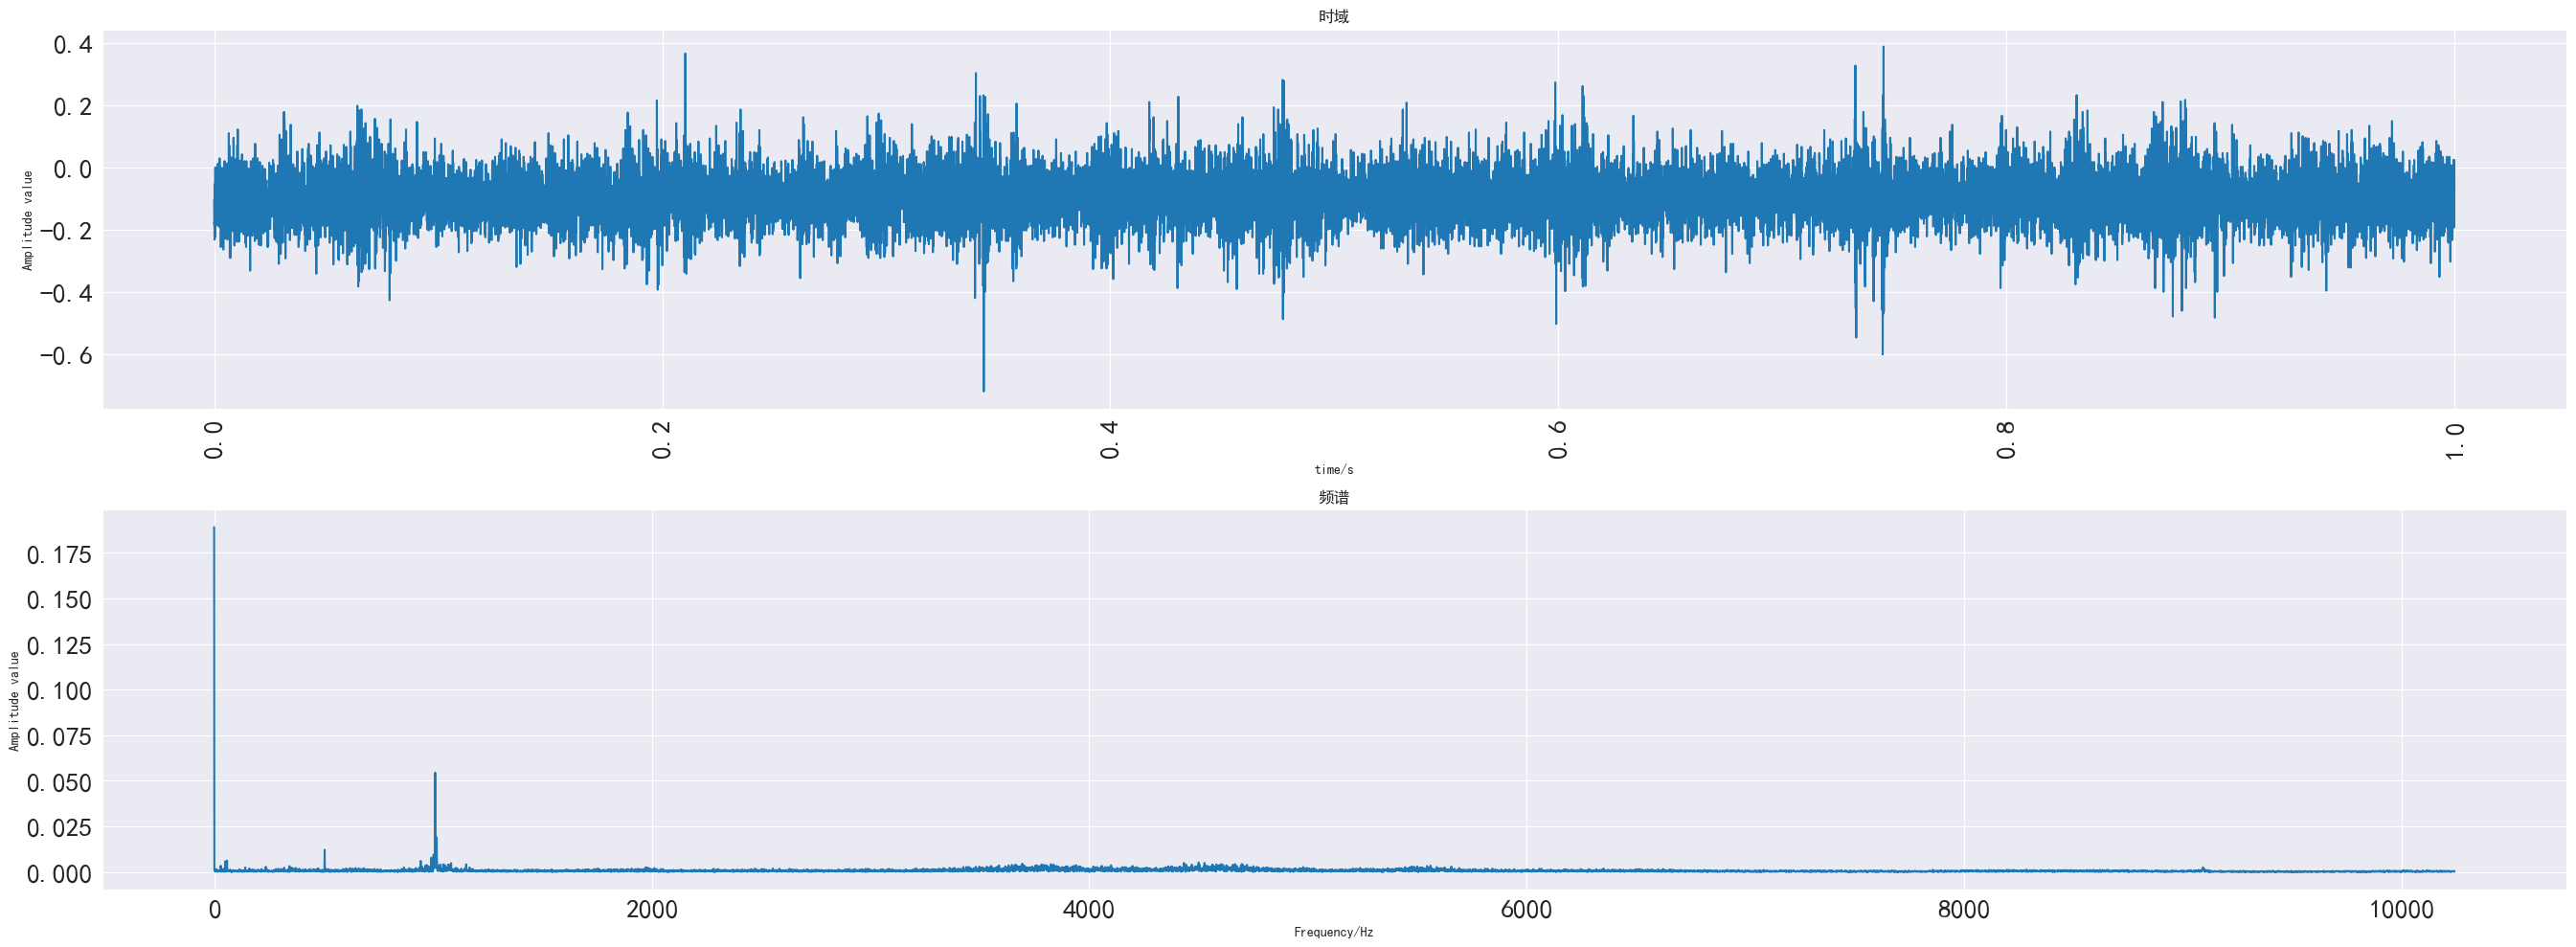

In [46]:
picture_fft(t, signal, N)

In [43]:
def hht_analysis(t, signal, N):
    decomposer = EMD(signal)
    imfs = decomposer.decompose()
    n_components = imfs.shape[0]
    fig, axes = plt.subplots(n_components, 2, figsize=(20, 15), sharex='col', sharey=False)

    for i in range(n_components):
        axes[i][0].plot(t, imfs[i])
        axes[i][0].set_title('imf{}'.format(i+1))

        yf = np.fft.fft(imfs[i])
        xf = np.linspace(0.0, N / 2, N // 2)
        axes[i][1].plot(xf, 2.0 / N * np.abs(yf[:N // 2]))  # 频谱幅值归一化，需要*2/N
        axes[i][1].set_title('IMF{}'.format(i + 1))
        pass
    plt.tight_layout()
    plt.show()

    return imfs
    pass


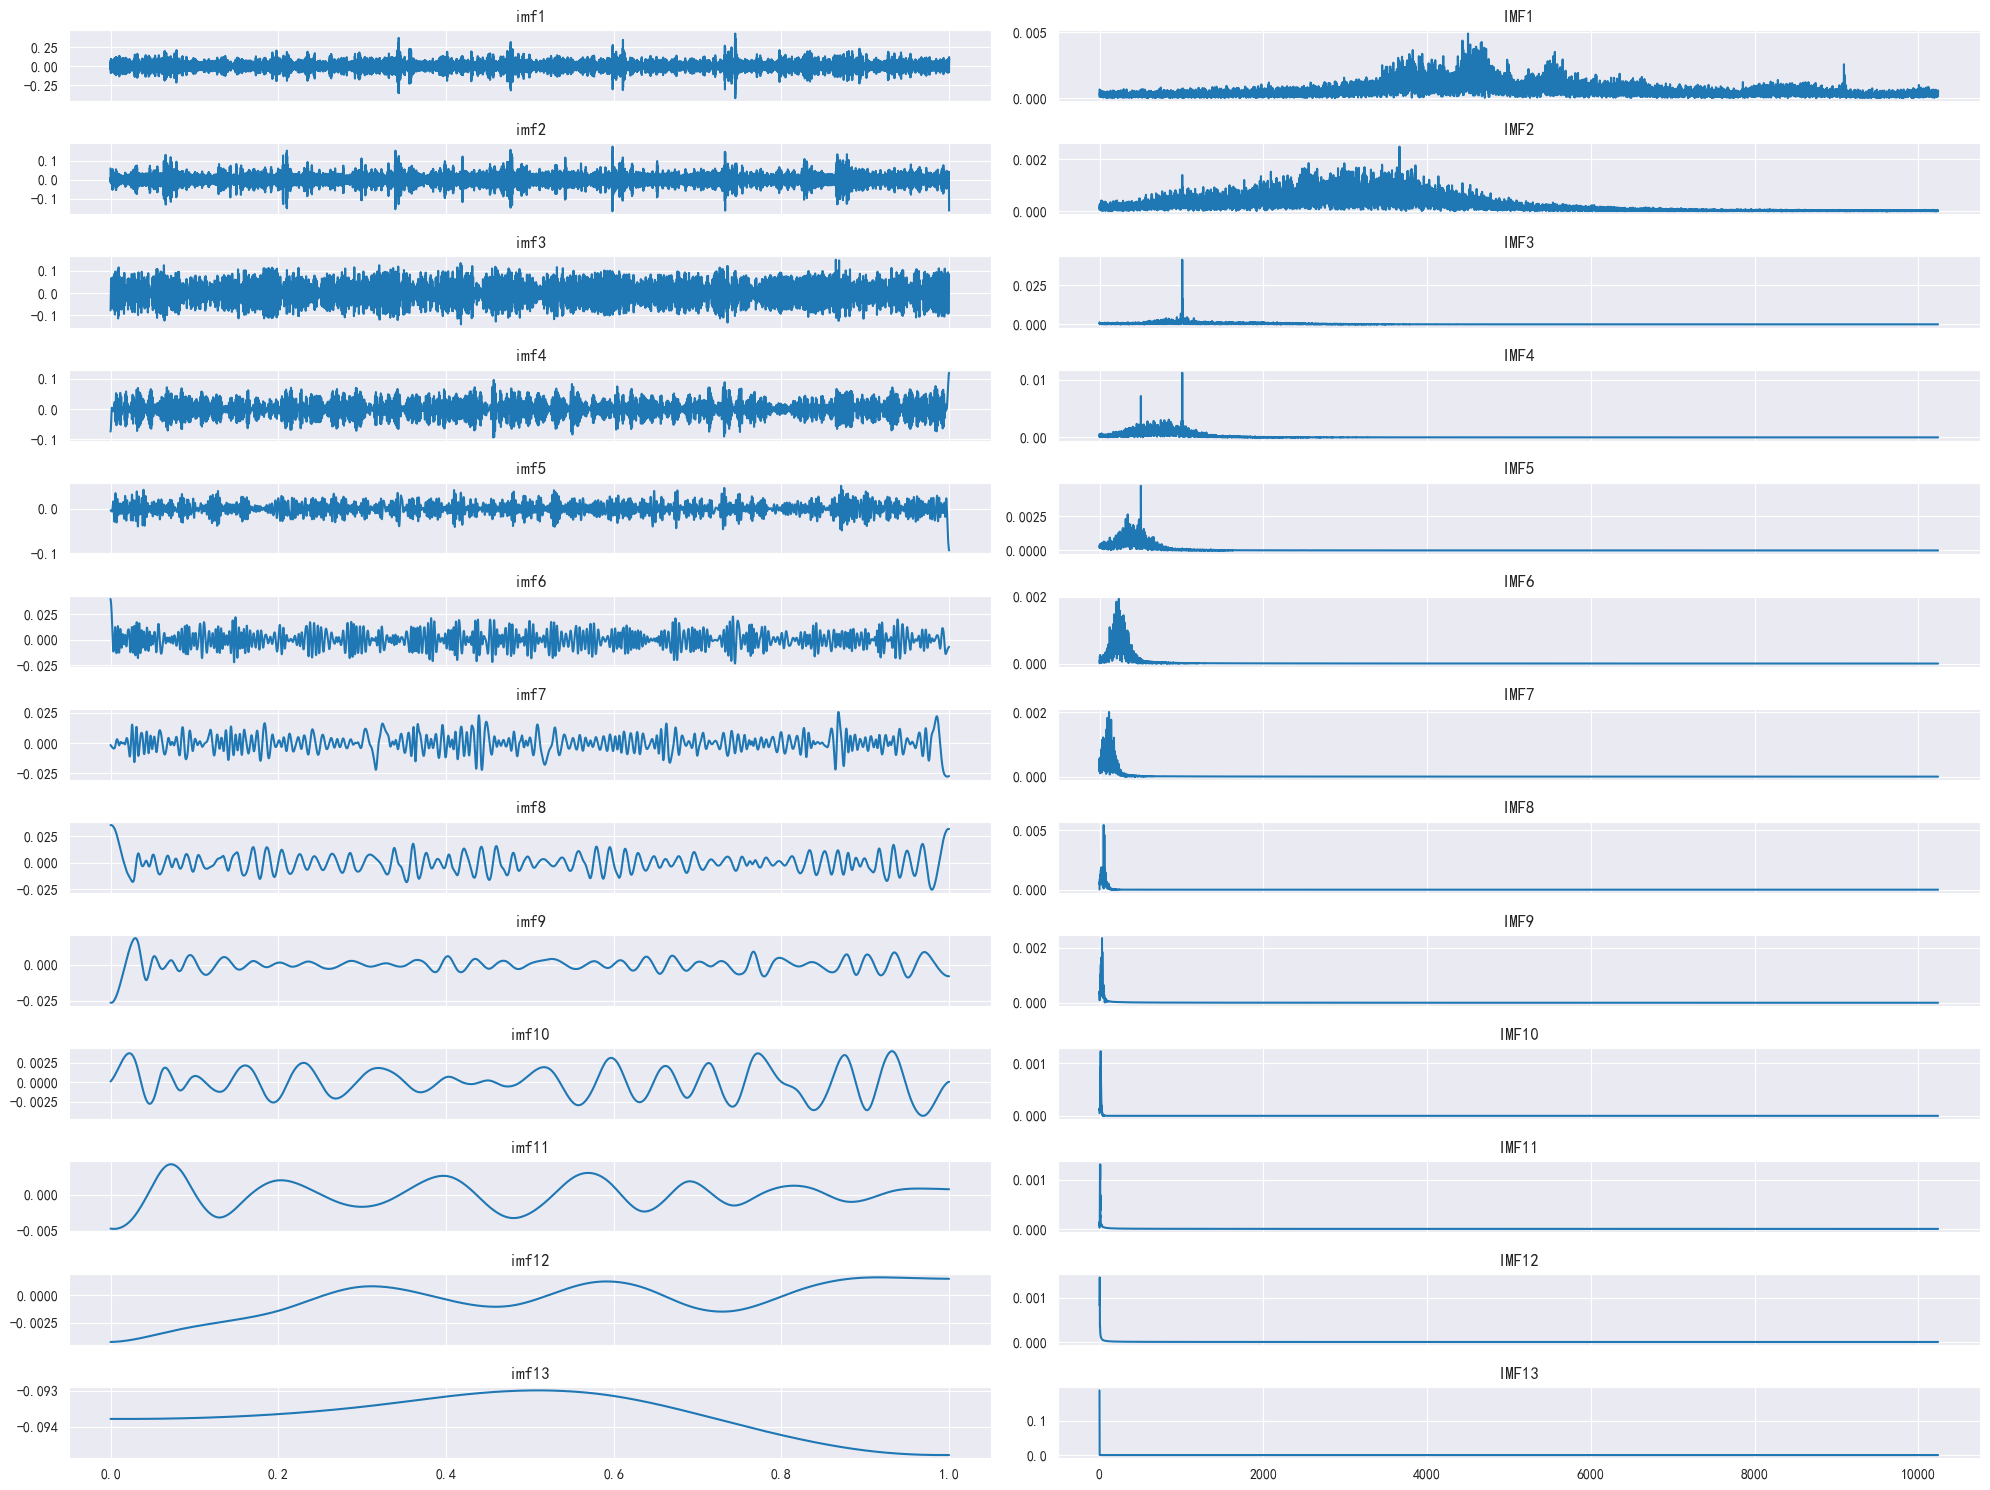

In [47]:
imfs = hht_analysis(t, signal, N)

In [48]:
imfs

array([[ 0.04699176, -0.01432059,  0.02115096, ..., -0.0814404 ,
         0.03082895,  0.11316853],
       [ 0.05921074,  0.04041949,  0.00338695, ..., -0.1152039 ,
        -0.15156985, -0.16221622],
       [-0.07887385, -0.07687489, -0.07060154, ...,  0.08010781,
         0.08211065,  0.08338423],
       ...,
       [-0.00468823, -0.00468914, -0.00469004, ...,  0.00073747,
         0.00073727,  0.00073706],
       [-0.0042698 , -0.00426972, -0.00426963, ...,  0.00151751,
         0.00151746,  0.00151741],
       [-0.09378538, -0.09378539, -0.0937854 , ..., -0.09478659,
        -0.09478658, -0.09478657]])

In [52]:
import tftb.processing

In [66]:
def HHTPicture(t, imfs, N, n):
    '''
    画出指定个数的IMFs的时域图和时频图
    输入：
    t: 0-1时间序列
    imfs: IMFs成分
    N: 1s内采样点数
    n: 指定画前几个IMFs成分
    输出：
    前n个IMFs的时域图和时频图
    '''
    fig2, axes = plt.subplots(n, 2, figsize=(20, 14), sharex='col', sharey=False)
    # 计算并绘制各个组分
    for iter in range(n):
        # 绘制分解后的IMF时域图
        axes[iter][0].plot(t, imfs[iter])
        axes[iter][0].set_xlabel('时间/s')
        axes[iter][0].set_ylabel('幅值')
        # 计算各组分的Hilbert变换
        imfsHT = hilbert(imfs[iter])
        # 计算各组分Hilbert变换后的瞬时频率
        instf, timestamps = tftb.processing.inst_freq(imfsHT)
        # 绘制瞬时频率，这里乘以fs是正则化频率到真实频率的转换
        fs = N
        axes[iter][1].plot(timestamps/fs, instf * fs)
        axes[iter][1].set_xlabel('时间/s')
        axes[iter][1].set_ylabel('频率/Hz')
        # 计算瞬时频率的均值和中位数
        axes[iter][1].set_title('Freq_Mean{:.2f}----Freq_Median{:.2f}'.format(np.mean(instf * fs), np.median(instf * fs)))
        plt.tight_layout()


def HHTFilter(signal, componentsRetain):
    '''
    定义HHT的滤波函数，提取部分EMD组分
    输入：
    signol: 信号
    componentsRetain: IMF的列表 []
    输出：
    一幅图，同时包含原始信号和合成信号
    '''
    # 进行EMD分解
    decomposer = EMD(signal)
    # 获取EMD分解后的IMF成分
    imfs = decomposer.decompose()
    # 选取需要保留的EMD组分，并且将其合成信号
    signalRetain = np.sum(imfs[componentsRetain], axis=0)
    # 绘图
    plt.figure(figsize=(20, 15))
    # 绘制原始数据
    plt.plot(signal, label='RawData')
    # 绘制保留组分合成的数据
    plt.plot(signalRetain, label='HHTData')
    # 绘制标题
    plt.title('RawData-----HHTData')
    # 绘制图例
    plt.legend()
    plt.tight_layout()
    plt.show()
    return signalRetain


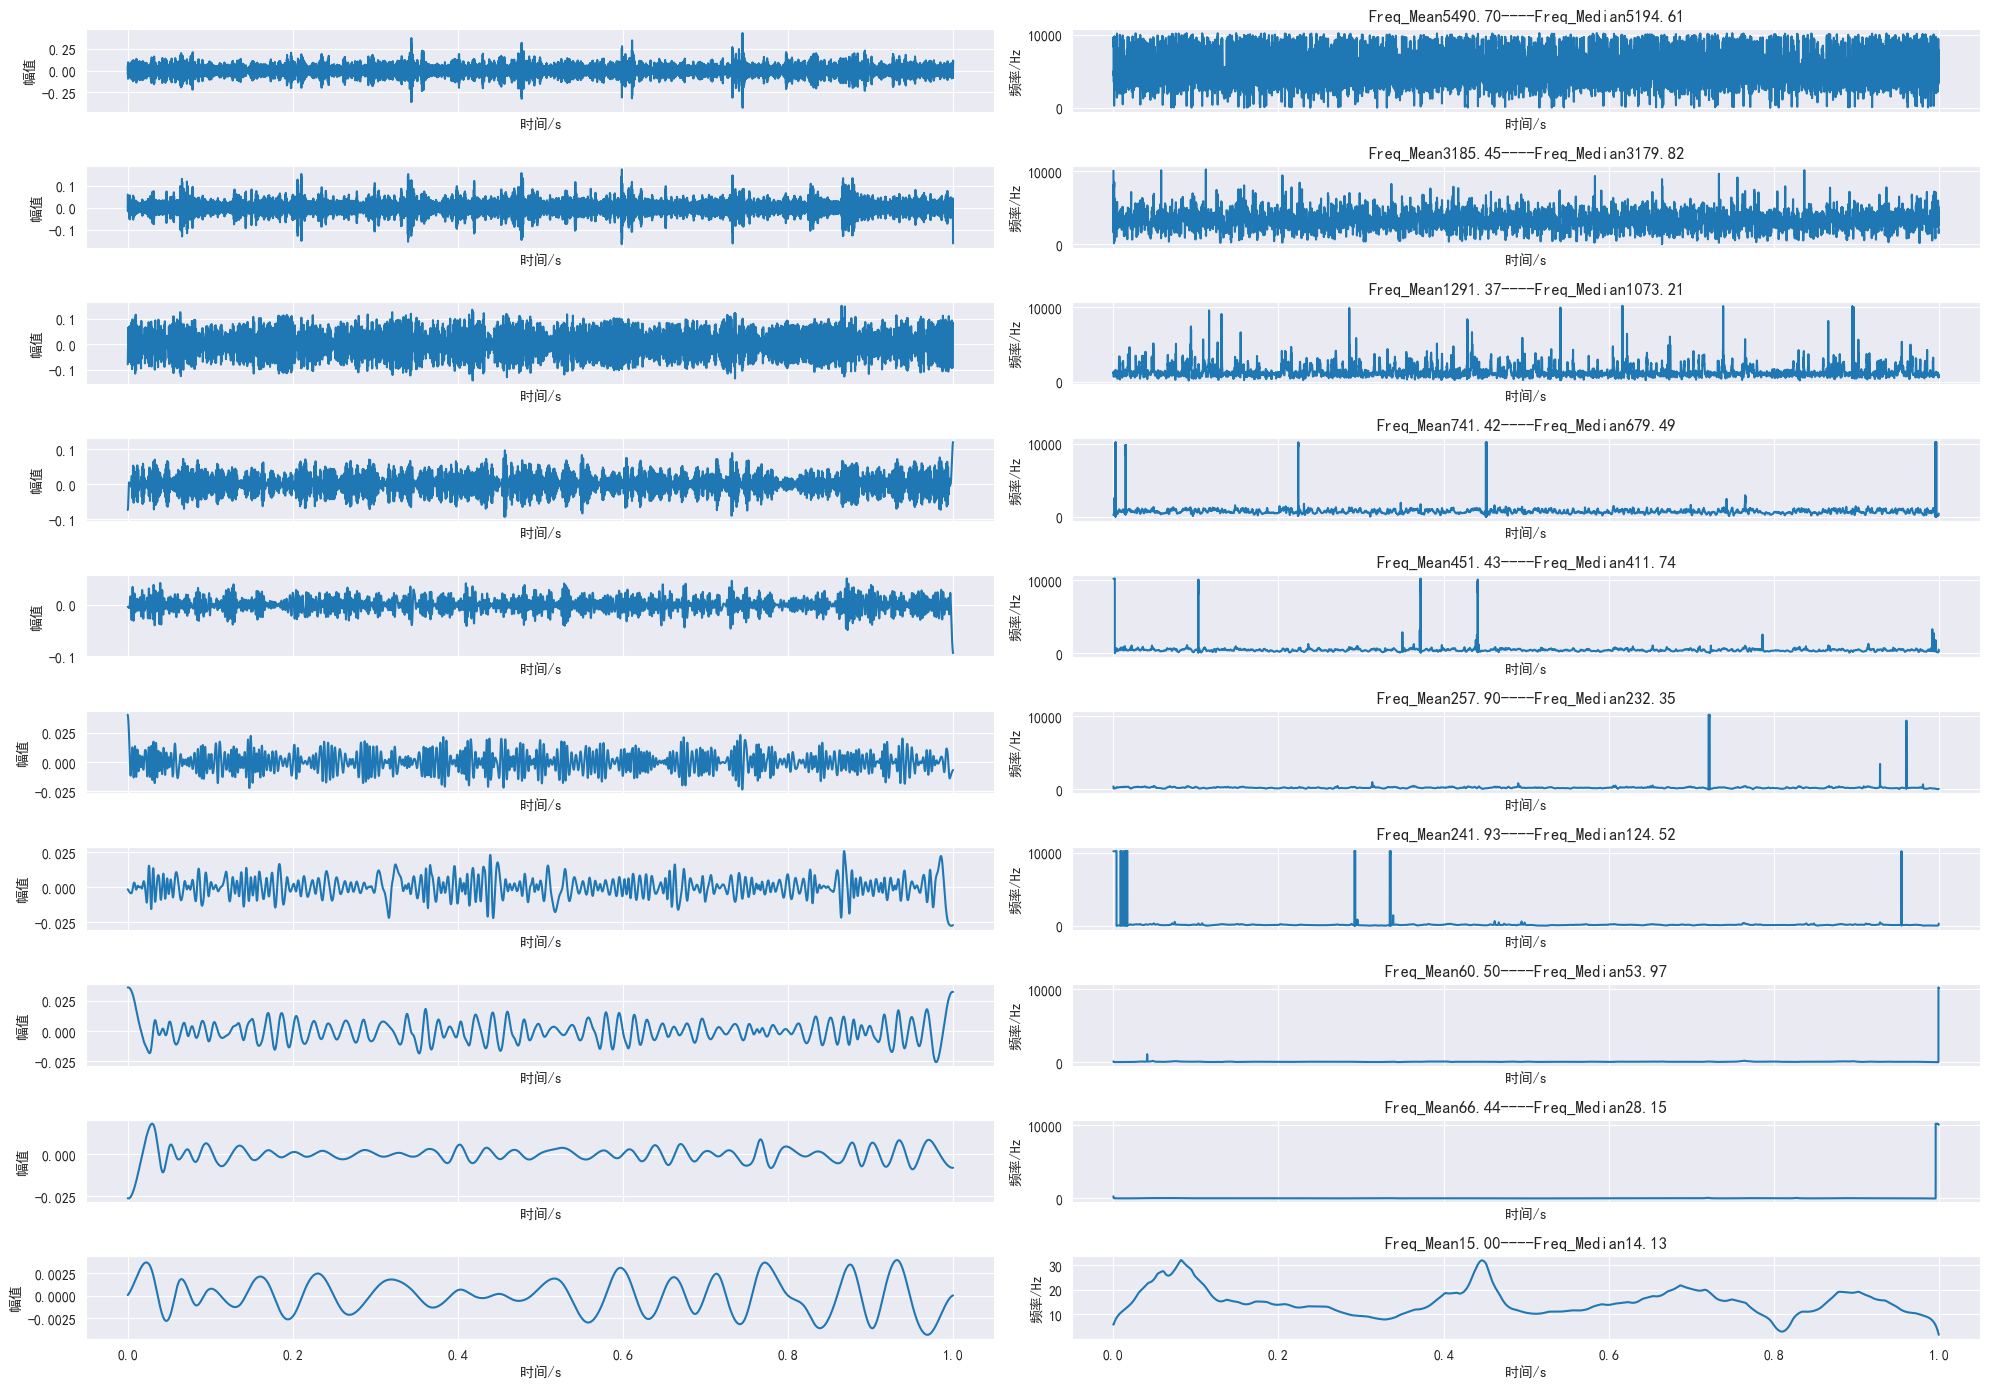

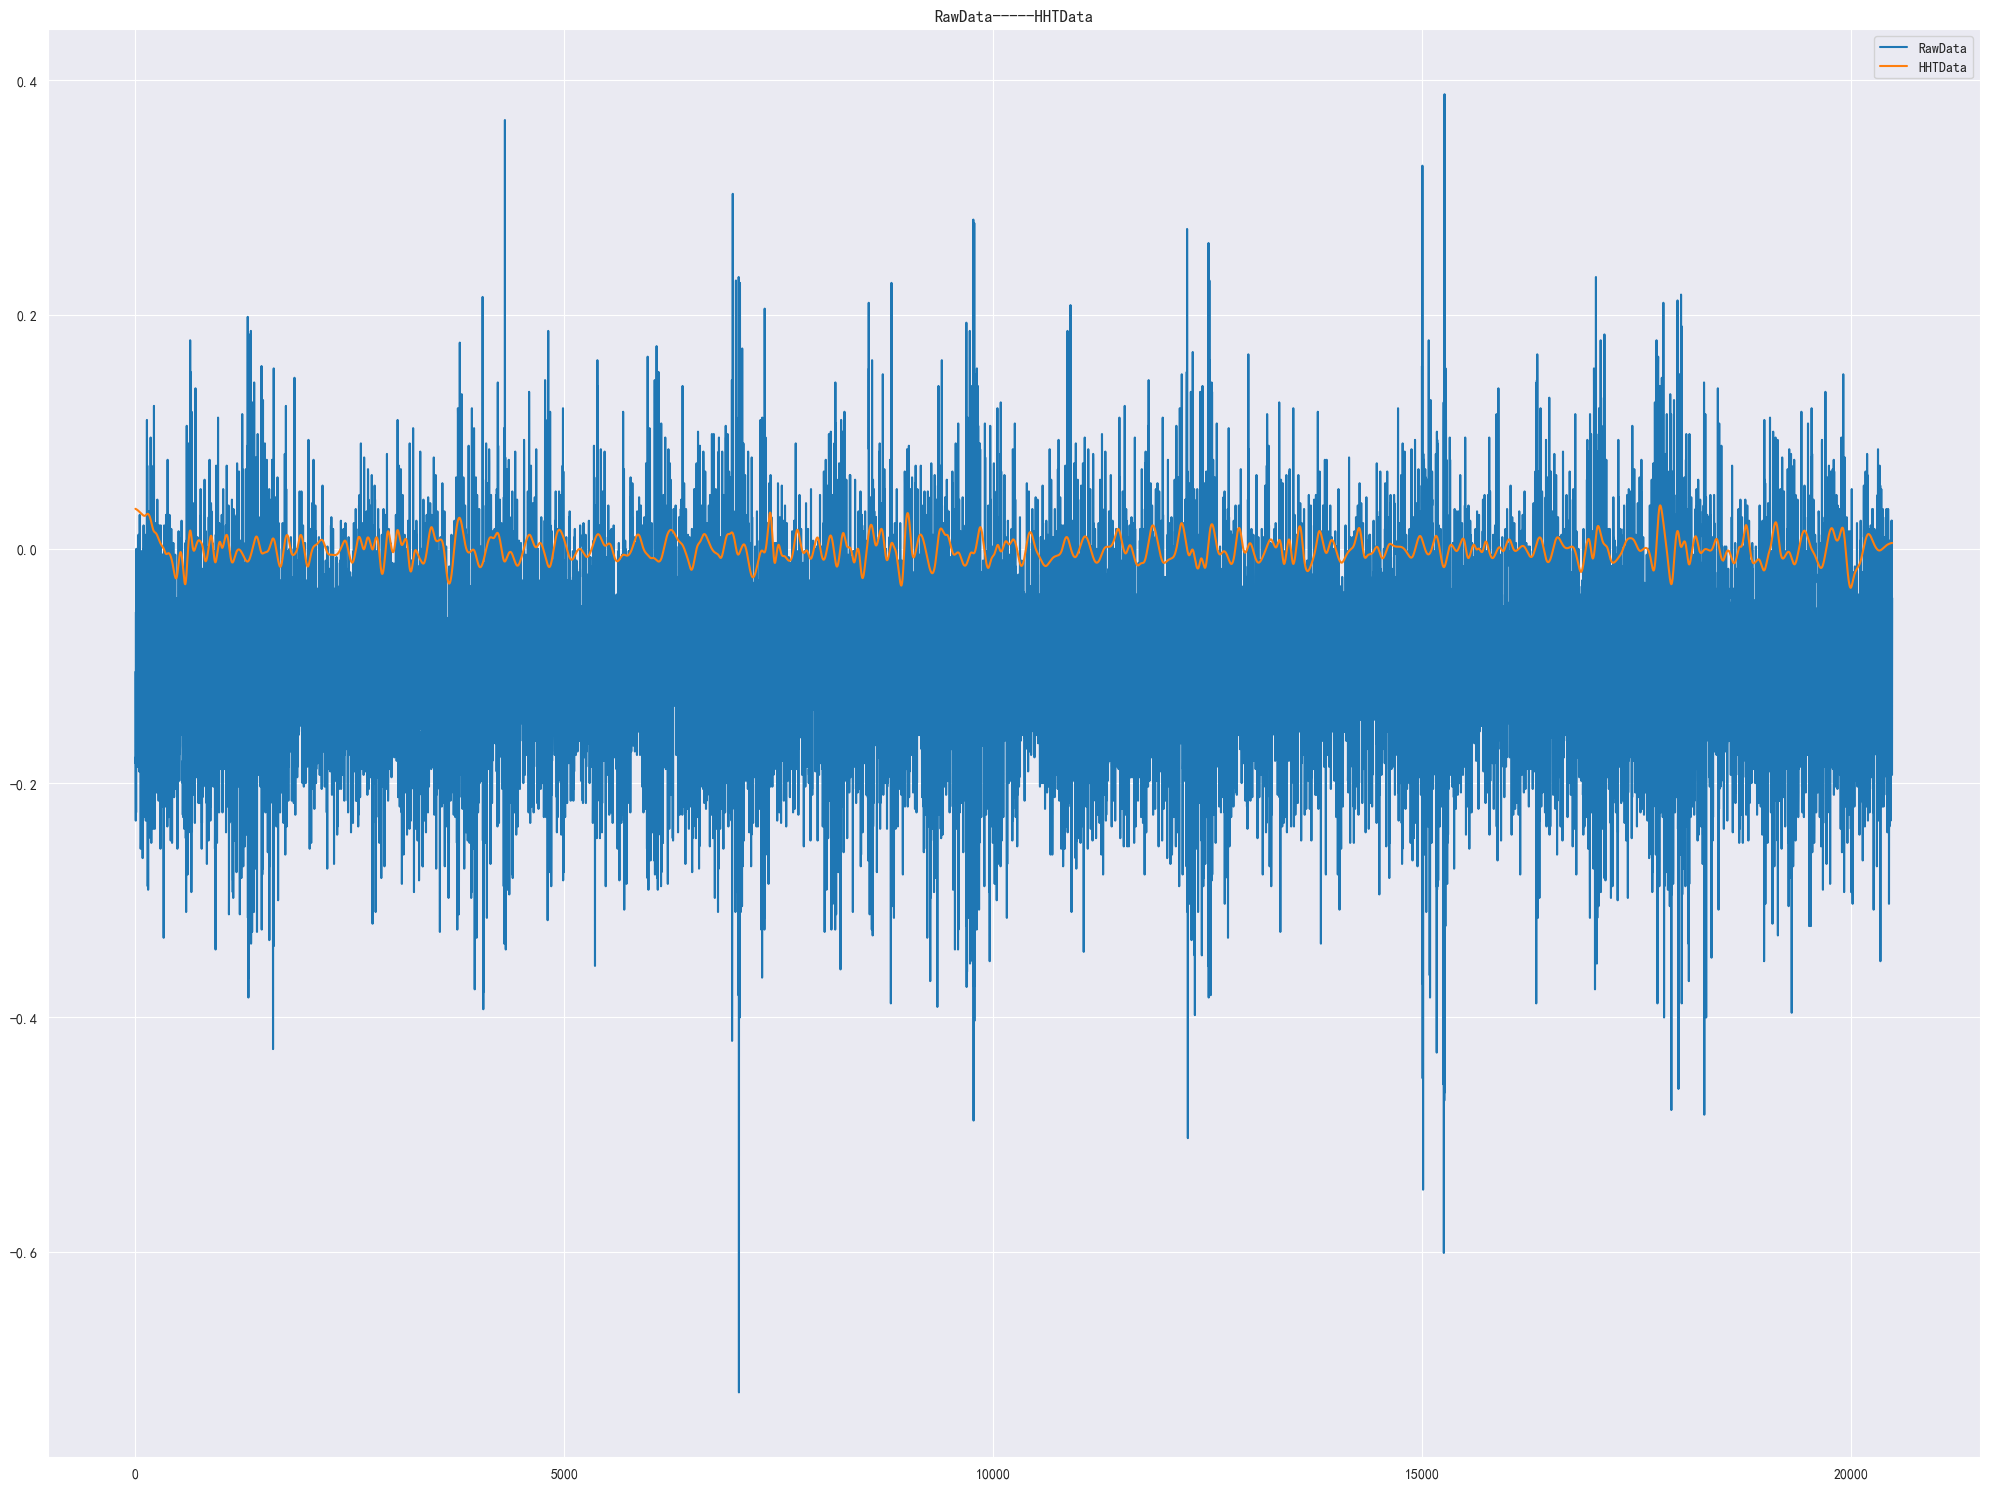

In [67]:
HHTPicture(t, imfs, N, 10)
signalRetain = HHTFilter(signal, [6, 7])